# Bayes Classification

## Simple explanation
A Bayes Classifier is just a method that:
1. **Starts with prior beliefs** about how likely each class is (e.g., spam vs. not spam).
2. **Looks at the evidence** (features, like words in an email).
3. Uses Bayes’s Rule to **update the probability of each class given the evidence**.
4. **Chooses the class with the highest probability**.

Imagine classifying fruits as apple or orange, based on color:
* Prior belief: 50% apples, 50% oranges.
* Likelihoods:
    * If apple → 80% chance it’s red.
    * If orange → 90% chance it’s orange.
Now you see a red fruit:
* Probability(Apple | red) > Probability(Orange | red)
* So → classify it as Apple.

## Definition Bayes' Rule
> Bayes’ Rule is a way to update probabilities when new evidence arrives.

$$P(H|E) = \frac{P(E|H) \cdot P(H)}{P(E)}$$

* $\text{H}$ = Hypothesis (what you want to know, e.g., “I have a disease”)
* $\text{E}$ = Evidence (what you observe, e.g., “The test is positive”)
* $\text{P(H)}$ = Prior probability (belief before new evidence)
* $\text{P(E|H)}$ = Likelihood (chance of seeing evidence if hypothesis is true)
* $\text{P(H|E)}$ = Posterior probability (belief after seeing evidence)

##  What is it Good For?
* **Medical diagnosis**: Updating probability of a disease given test results.
* **Spam filtering**: Classifying emails as spam/non-spam.
* **Fraud detection**: Updating belief that a transaction is fraudulent given unusual activity.
* **Machine learning**: Core of Naïve Bayes classifiers.


## Example — Medical Testing
**Suppose**:
* 1% of people have a certain disease → P(H) = 0.01.
* Test detects disease correctly 99% of the time (sensitivity) → P(E|H) = 0.99.
* Test falsely says positive 5% of the time (false positive rate) → P(E|\neg H) = 0.05.

**Now, if you test positive, what’s the probability you actually have the disease?**


In [1]:
# Bayes Rule Example: Disease Testing
# Given a positive test, compute the probability of actually having the disease

# Prior probability of disease
P_H = 0.01  # 1%

# Probability of positive test given disease (sensitivity)
P_E_given_H = 0.99  

# Probability of positive test given no disease (false positive rate)
P_E_given_notH = 0.05  

# Probability of NOT having the disease
P_notH = 1 - P_H  

# Total probability of testing positive
P_E = P_E_given_H * P_H + P_E_given_notH * P_notH  

# Apply Bayes' Rule
P_H_given_E = (P_E_given_H * P_H) / P_E

print(f"Probability of having the disease given a positive test: {P_H_given_E:.2%}")

Probability of having the disease given a positive test: 16.67%


## Bayes Classifier
Uses Bayes’s Rule to classify:
$$\hat{C} = \arg\max_{C} P(C) \cdot P(\text{features} | C)$$

* **Theoretically optimal** if we know the true distributions.
* **Challenge**: Computing P(\text{features} | C) can be very hard when features are many and correlated (e.g., words in text).

# Naive Bayes Classifier

**Naive assumption**: Features are independent given the class.
$$P(\text{features}|C) = \prod_{i=1}^n P(x_i|C)$$

* **Why "naive**": In reality features are often correlated, but the independence assumption works surprisingly well.
* This makes computation easy and scalable, even with thousands of features (like text classification).
* Works surprisingly well in practice, especially for high-dimensional data (spam, sentiment, document classification).
* But it’s only an approximation (since real-world features are rarely independent).

* **Goal**: Classify data into categories using Bayes’s Rule.
* **Use cases**: Spam filtering, sentiment analysis, document classification, fraud detection.

## Example: Spam Classifier
We want to classify emails as Spam or Not Spam based on words.

Suppose our training data is small:

| Email   | Contains "Buy" | Contains "Offer" | Class    |
| ------- | -------------- | ---------------- | -------- |
| Email 1 | Yes            | Yes              | Spam     |
| Email 2 | Yes            | No               | Spam     |
| Email 3 | No             | Yes              | Not Spam |
| Email 4 | No             | No               | Not Spam |

## Manual Walkthrough
Prior probabilities: P(\text{Spam}) = 0.5, \quad P(\text{Not Spam}) = 0.5

Likelihoods:

* $P(\text{Buy}|\text{Spam}) = 1/2$
* $P(\text{Offer}|\text{Spam}) = 1/2$
* $P(\text{Buy}|\text{Not Spam}) = 0/2 = 0$
* $P(\text{Offer}|\text{Not Spam}) = 1/2$
To avoid zeros, we usually use Laplace smoothing.

## Python Implementation (with Scikit-learn)

In [3]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

# Sample dataset
emails = [
    "Buy cheap offer now",
    "Limited buy deal",
    "Meeting schedule offer",
    "Project discussion tomorrow"
]
labels = ["spam", "spam", "not spam", "not spam"]

# Convert text to feature counts (Bag-of-Words)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(emails)

# Train Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X, labels)

# Test new email
test_email = ["Cheap buy offer today"]
X_test = vectorizer.transform(test_email)
prediction = clf.predict(X_test)

prediction[0]

np.str_('spam')

## Naive Bayes Decision Boundary with 2 features

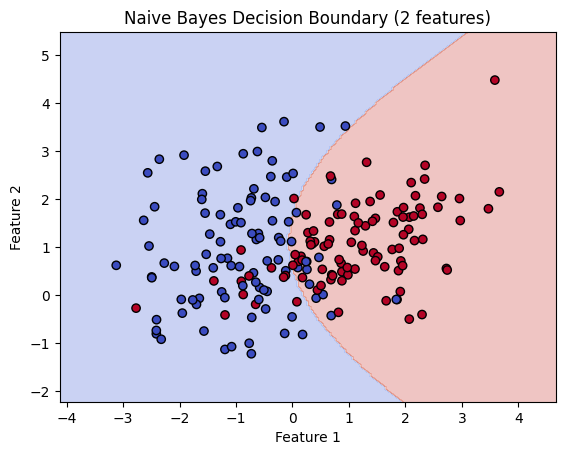

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB

# Generate toy dataset (2 classes, 2 features)
X, y = make_classification(
    n_samples=200, n_features=2, n_redundant=0, n_informative=2,
    n_clusters_per_class=1, random_state=42
)

# Train Naive Bayes classifier
clf = GaussianNB()
clf.fit(X, y)

# Create grid for decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=plt.cm.coolwarm)
plt.title("Naive Bayes Decision Boundary (2 features)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
